<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat4/A6WritingDataSpasial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import read_file, datasets, GeoDataFrame

In [2]:
nama='lsm.zip'
kota=gpd.read_file(nama)

<Axes: >

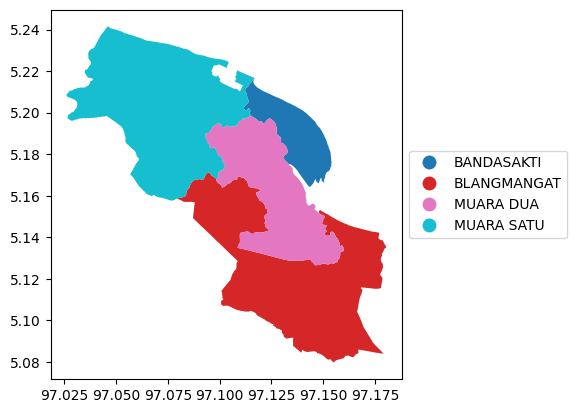

In [9]:
kota.plot(column='NAMOBJ', legend=True,categorical=True,
          legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [10]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


In [68]:
import pandas as pd
data=pd.read_excel('penduduk.xlsx')

In [69]:
data.head()

,NAMOBJ,jumlah
0,BANDASAKTI,1200
1,BLANGMANGAT,900
2,MUARA DUA,1000
3,MUARA SATU,850


In [70]:
kota1=kota.merge(data, on='NAMOBJ' )
kota1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,jumlah
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...",1200
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...",900
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...",1000
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...",850


<Axes: >

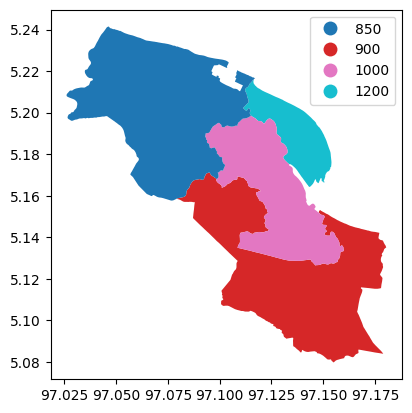

In [71]:
kota1.plot(column='jumlah', legend=True, categorical=True)

**Tulis Data dan Spasial Data**

In [72]:
#-- konversi data ke dictionary --
dc_data=data.to_dict()
dc_data

{'NAMOBJ': {0: 'BANDASAKTI',
  1: 'BLANGMANGAT',
  2: 'MUARA DUA',
  3: 'MUARA SATU'},
 'jumlah': {0: 1200, 1: 900, 2: 1000, 3: 850}}

In [73]:
for i in dc_data['jumlah'].values():
  print(i)

1200
900
1000
850


In [74]:
klasifikasi=[]
for i in dc_data['jumlah'].values():
  if i>1000:
    klasifikasi.append('Sangat Padat')
  elif i>900 and i<=1000:
    klasifikasi.append('Padat')
  else:
    klasifikasi.append('Rendah')


In [75]:
klasifikasi

['Sangat Padat', 'Rendah', 'Padat', 'Rendah']

In [76]:
#-- Konversikan dc_data ke GeoDataFrame
gData=gpd.GeoDataFrame(dc_data)

In [77]:
dc_data


{'NAMOBJ': {0: 'BANDASAKTI',
  1: 'BLANGMANGAT',
  2: 'MUARA DUA',
  3: 'MUARA SATU'},
 'jumlah': {0: 1200, 1: 900, 2: 1000, 3: 850}}

In [78]:
##-- Memasukkan klasifikasi ke gData --
gData['klasifikasi']=klasifikasi

In [79]:
gData.head()

,NAMOBJ,jumlah,klasifikasi
0,BANDASAKTI,1200,Sangat Padat
1,BLANGMANGAT,900,Rendah
2,MUARA DUA,1000,Padat
3,MUARA SATU,850,Rendah


<Axes: >

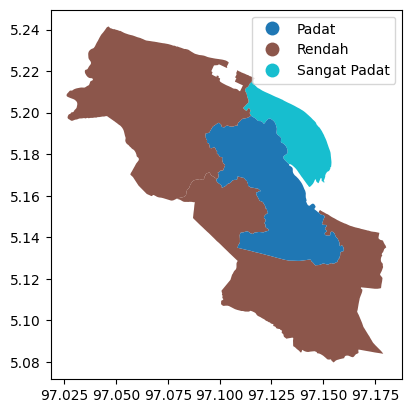

In [84]:
kota2=kota.merge(gData, on='NAMOBJ')
kota2.plot(column='klasifikasi', categorical=True, legend=True)

<Axes: >

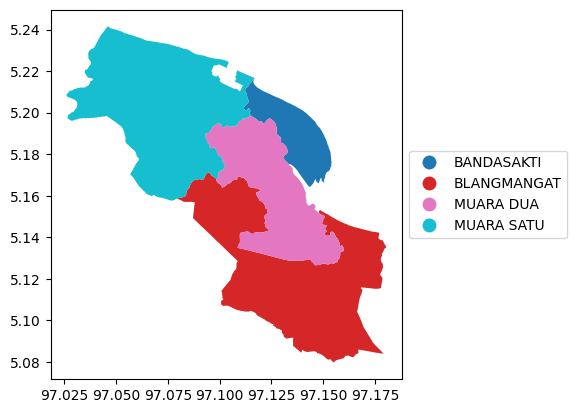

In [88]:
kota2.plot(column='NAMOBJ', legend=True,
          legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)} )